pre-require: pytorch

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/nightly/cpu
     |████████████████████████████████| 143.4 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 262 kB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 710 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 153 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 532 kB 4.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


install dataset requirement

In [3]:
!pip3 install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached accelerate-0.19.0-py3-none-any.whl (219 kB)
  Using cached beartype-0.14.0-py3-none-any.whl (720 kB)
  Using cached einops-0.6.1-py3-none-any.whl (42 kB)
  Using cached ema_pytorch-0.2.3-py3-none-any.whl (4.4 kB)
     |████████████████████████████████| 1.2 MB 768 kB/s eta 0:00:01
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Using cached vector_quantize_pytorch-1.5.18-py3-none-any.whl (12 kB)
  Using cached datasets-2.12.0-py3-none-any.whl (474 kB)
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
     |████████████████████████████████| 4.0 MB 5.0 MB/s eta 0:00:01
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
     |████████████████████████████████| 132 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 24.8 MB 5.7 MB/s eta 0:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.13.4
    Uninstallin

Found cached dataset cc6204-hackaton-cub-dataset (/Users/caizhengyu/.cache/huggingface/datasets/alkzar90___cc6204-hackaton-cub-dataset/default/0.0.0/de850c9086bff0dd6d6eab90f79346241178f65e1a016a50eec240ae9cdf2064)


  0%|          | 0/2 [00:00<?, ?it/s]

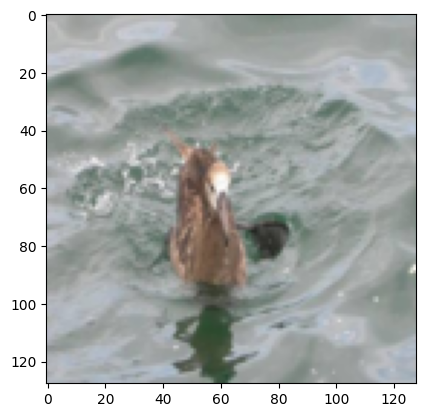

('this bird is brown with a lighter brown crest.', 'the wings are brown, long and narrow, and have white markings on the secondaries, the bill is blunt tipped and black, the head is light brown with a white thin marking between the eye and the beak.')


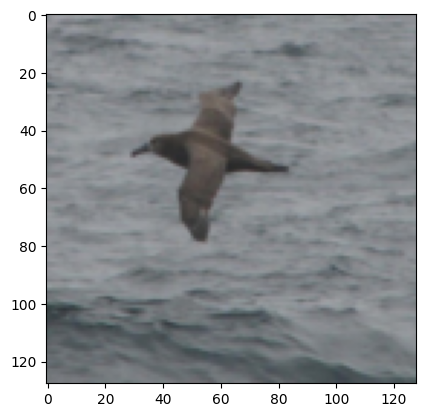

("here we have a bird soaring above the water and it's color is dark brown, he seems to have a long dark colored bill with a white ring around it on the upper part near the bill.", 'this flying bird has long brown wings and a black bill with a white stripe around it.')


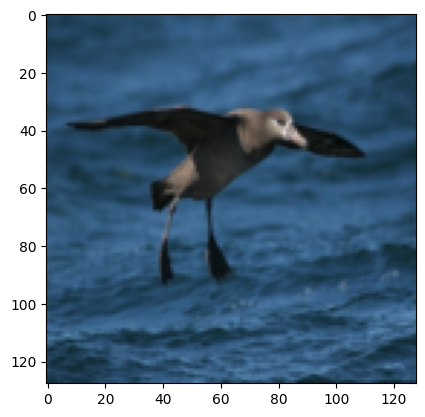

('this is mostly brown bird with webbed feet that are also brown.', 'bird with large wingspan, very long and thick downward curved beak.')


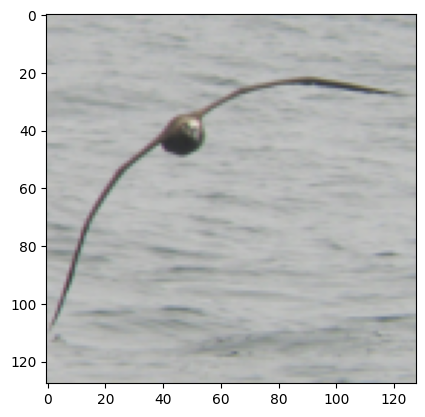

('this bird is almost completely dark gray, it has a light gray crown.', 'a brown bird with white on the supercillary and a brown bill')


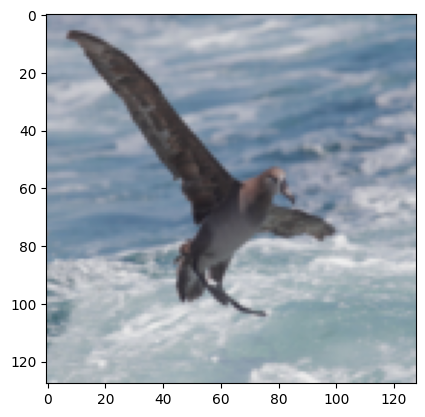

("a large bird has a white belly, long tarsus', and webbed black feet.", 'medium to large sized bird with a grey body and dark wings with white spots around the eyes and tails.')


In [6]:
# Path: muse/muse_maskgit_pytorch/utils_data.py
import os, sys
from muse_maskgit_pytorch import utils_data
import importlib
importlib.reload(utils_data)

utils_data.test()

Found cached dataset cc6204-hackaton-cub-dataset (/Users/caizhengyu/.cache/huggingface/datasets/alkzar90___cc6204-hackaton-cub-dataset/default/0.0.0/de850c9086bff0dd6d6eab90f79346241178f65e1a016a50eec240ae9cdf2064)


  0%|          | 0/2 [00:00<?, ?it/s]

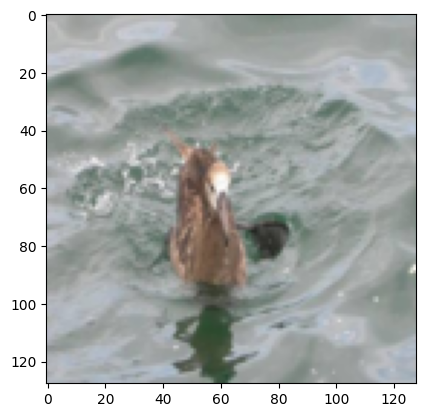

('this bird is brown with a lighter brown crest.', 'the wings are brown, long and narrow, and have white markings on the secondaries, the bill is blunt tipped and black, the head is light brown with a white thin marking between the eye and the beak.')


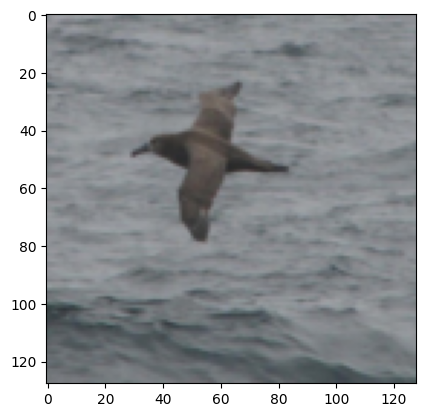

("here we have a bird soaring above the water and it's color is dark brown, he seems to have a long dark colored bill with a white ring around it on the upper part near the bill.", 'this flying bird has long brown wings and a black bill with a white stripe around it.')


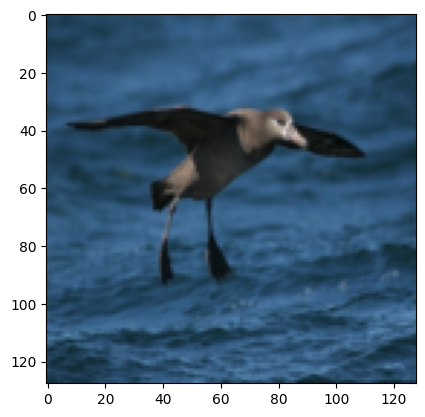

('this is mostly brown bird with webbed feet that are also brown.', 'bird with large wingspan, very long and thick downward curved beak.')


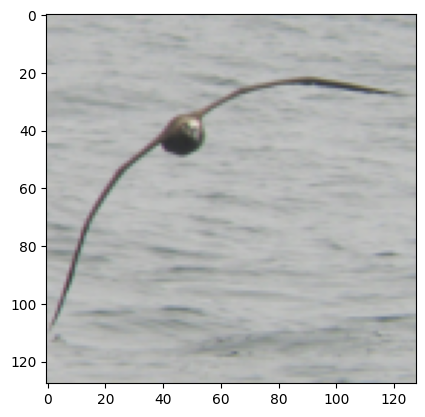

('this bird is almost completely dark gray, it has a light gray crown.', 'a brown bird with white on the supercillary and a brown bill')


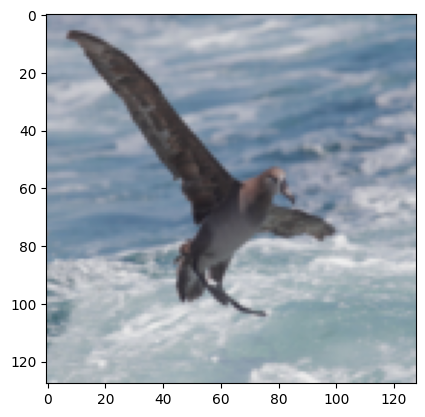

("a large bird has a white belly, long tarsus', and webbed black feet.", 'medium to large sized bird with a grey body and dark wings with white spots around the eyes and tails.')


In [5]:
# Path: muse/muse_maskgit_pytorch/utils_data.py
import os, sys
from muse_maskgit_pytorch import utils_data
import importlib
importlib.reload(utils_data)

utils_data.test()

Found cached dataset cc6204-hackaton-cub-dataset (/Users/caizhengyu/.cache/huggingface/datasets/alkzar90___cc6204-hackaton-cub-dataset/default/0.0.0/de850c9086bff0dd6d6eab90f79346241178f65e1a016a50eec240ae9cdf2064)


  0%|          | 0/2 [00:00<?, ?it/s]

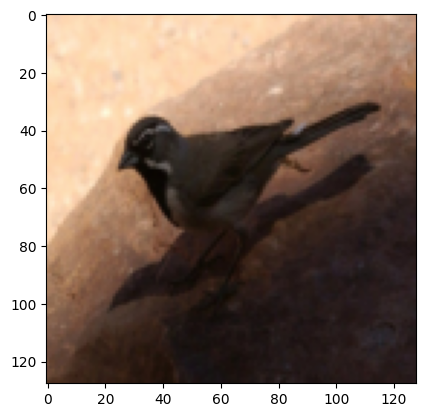

('this bird has a black head, a white superciliary, a brown wing, and a black outer rectrices.', 'this small-beaked bird has mostly black plumage, a broad chest, and black feet.')


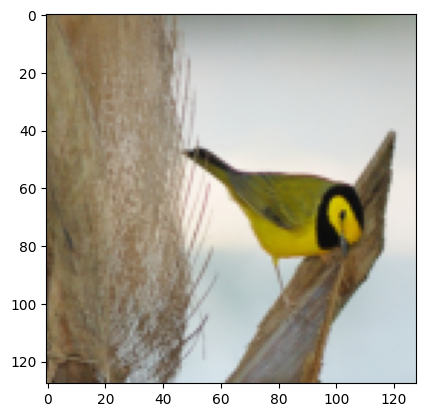

('this bird has bright yellow feathers and a black beak.', 'this small bird has a deep gray throat, head, and back with a striking bright yellow belly and breast.')


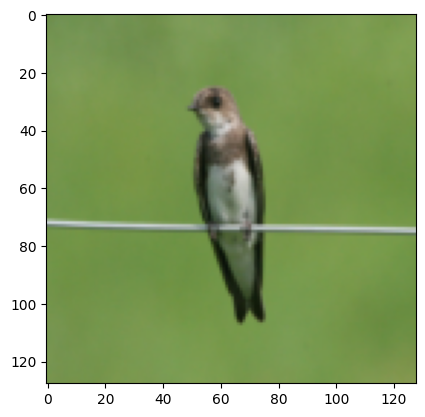

('this bird is brown with white and has a very short beak.', 'this bird is brown with white on it and has a very short beak.')


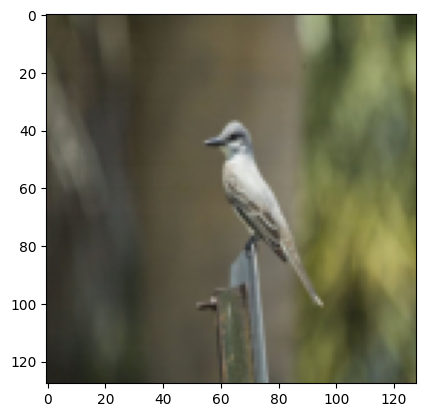

('this small bird is of variant shades of gray, and its beak is short and pointed.', 'the bird is small with light to dark brown feathers and black eyes.')


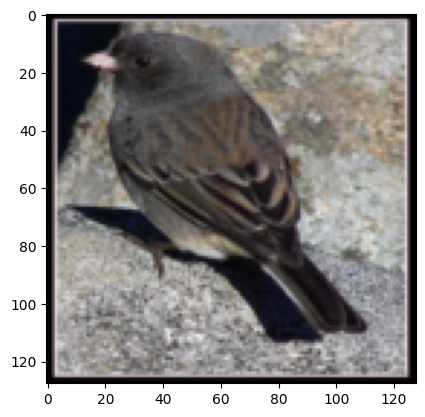

('this is a small grey bird with black wings and a white beak.', 'the head, throat, down to belly and abdomen is yellow, while the coverts are brown.')


In [43]:
# Path: muse/muse_maskgit_pytorch/utils_data.py
import os, sys
from muse_maskgit_pytorch import utils_data
import importlib
importlib.reload(utils_data)

utils_data.test()

In [ ]:
from muse_maskgit_pytorch import utils_data
importlib.reload(utils_data)
args = utils_data.get_args()
dataset = utils_data.get_dataset(args, image_size=args.image_size, is_train=True, is_only_image=False)


In [ ]:
# Path: muse/example/train.py
from example import train
import importlib
importlib.reload(train)

args = utils_data.get_args()
train.train_vae(args)
train.train_base(args)
train.train_superres(args)
train.inference(args)



In [3]:
import numpy as np
np.random.choice(100)

47